In [1]:
using CSV, DataFrames, DifferentialEquations, Plots, LaTeXStrings

In [2]:
ddat = CSV.read("CSV/digitized.csv", DataFrame);
species = Array(ddat[!, 2:end])
t = ddat[!, :t]

function kinetic_model!(du, u, p, t)
    cA, cB, cC, cD, cE, cF, cG = u
    k1, k2, k3, k4, k5, k6 = p
    du[1] = - k1*cA - k4*cA - k5*cA*cE
    du[2] = k1*cA - k2*cB - k3*cB
    du[3] = k2*cB - k4*cC
    du[4] = k4*cA - k3*cD
    du[5] = k3*cB - k5*cA*cE
    du[6] = k5*cA*cE - k6*cF*cG^2
    du[7] = - k6*cF*cG^2
end;

u0 = [0.5, 0.0, 0.0, 0.01, 0.0, 0.3, 0.5]
tspan = (0.0, 20.0)
p = [0.3, 0.1, 0.1, 0.4, 0.02, 0.6]
prob = ODEProblem(kinetic_model!, u0, tspan, p)
sol = solve(prob, saveat=t);

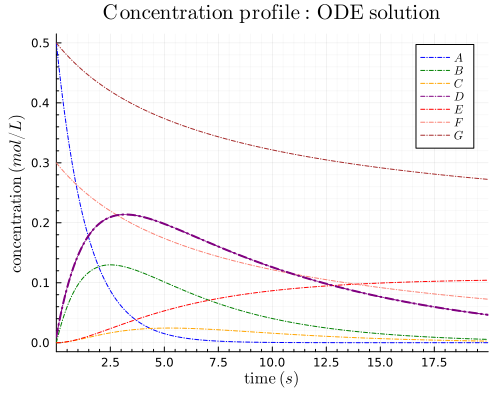

In [3]:
plot(sol, ls=:dashdot, label=[L"A" L"B" L"C" L"D" L"E" L"F" L"G"],
     color=[:blue :green :orange :purple :red :salmon :brown])
plot!(t, Array(sol)[4, :], lw=2.0, ls=:dashdot, label=false, color=:purple)
plot!(xlabel=L"$\mathrm{time}\,\,(s)$", ylabel=L"$\mathrm{concentration}\,\,(mol/L)$",
      minorgrid=true, size=(500,400))
plot!(title=L"$\mathrm{Concentration\,\,profile:ODE\,\,solution}$")

In [4]:
using Distributions, DelimitedFiles

λ = 0.015
rango = Uniform(-1, 1)
G_lost = Array(sol(t[t.>16.58]))[end, :]
G_noisy = G_lost.+ λ.*rand(rango, length(G_lost))
plot(size=(400,300), G_noisy)
writedlm( "CSV/G_lost.csv",  G_lost, ',')
writedlm( "CSV/G_noisy.csv",  G_noisy, ',')

In [5]:
colors = [:blue :green :orange :purple :red :salmon :brown]
labels = [L"A" L"B" L"C" L"D" L"E" L"F" L"G"]
plot(sol, ls=:solid, label=false, color=colors)
scatter!(t, species, markersize=0.25, marker=:circle,
         markerstrokecolor=colors, label=labels, color=colors)
plot!(t, species, ls=:dashdot, lw=0.25, color=colors, label=false)
plot!(xlabel=L"$\mathrm{time}\,\,(s)$", ylabel=L"$\mathrm{concentration}\,\,(mol/L)$", minorgrid=true)
plot!(size=(600,500), title=L"$\mathrm{Concentration\,\,profile:ODE\,\,solution\,\,&\,\,raw\,\,data}$")

***